# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Laeli Salsa Anisa
- **Email:** laeli.anisa@mhs.unsoed.ac.id
- **ID Dicoding:** MC229D5X0764

## Menentukan Pertanyaan Bisnis

- Musim apa yang memiliki jumlah penyewaan sepeda paling banyak dan paling sedikit?
- Bagaimana tren peminjaman sepeda dari tahun 2011 sampai dengan 2012?

## Import Semua Packages/Library yang Digunakan

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling



### Gathering Data

In [21]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)
all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


**Insight:**
- Dilakukan penggabungan data day_df dan hour_df menjadi all_df

### Assessing Data

In [24]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   holiday     18110 non-null  int64  
 6   weekday     18110 non-null  int64  
 7   workingday  18110 non-null  int64  
 8   weathersit  18110 non-null  int64  
 9   temp        18110 non-null  float64
 10  atemp       18110 non-null  float64
 11  hum         18110 non-null  float64
 12  windspeed   18110 non-null  float64
 13  casual      18110 non-null  int64  
 14  registered  18110 non-null  int64  
 15  cnt         18110 non-null  int64  
 16  hr          17379 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB


In [25]:
all_df .isna().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hr            731
dtype: int64

In [26]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


In [27]:
all_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,17379.000000
mean,8354.006405,2.501436,0.502485,6.537051,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,11.546752
std,5180.771860,1.107045,0.500008,3.439213,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954,6.914405
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3797.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,6.000000
50%,8324.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000,12.000000
75%,12851.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,18.000000
max,17379.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000,23.000000


**Insight:**
- Terdapat 731 missing value pada kolom hr 
- Mengubah tipe data pada season menjadi pelabelan sesuai dengan keteranganya.
- Untuk kolom selain hr dan season, tidak ada keanehan nilai.

### Cleaning Data

In [28]:
#menangani tipe data season
season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

all_df["season"] = all_df["season"].replace(season_mapping)


In [29]:
#menangani missing value hr
all_df['hr'] = all_df['hr'].ffill()

**Insight:**
- Tipe data season dibuah menjadi 
    1: Spring,
    2: Summer,
    3: Fall,
    4: Winter
- Menangani missing value dengan mengisi data yang missing value.

## Exploratory Data Analysis (EDA)

### Explore ...

In [30]:
all_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,18110.000000,18110,18110,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,4684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8354.006405,NaN,NaN,0.502485,6.537051,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,11.546752
std,5180.771860,NaN,NaN,0.500008,3.439213,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954,6.914405
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3797.250000,NaN,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,6.000000
50%,8324.500000,NaN,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000,12.000000
75%,12851.750000,NaN,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,18.000000


In [31]:
season_rentals_df = (all_df.groupby("season")["cnt"].sum().sort_values(ascending=False).reset_index())
season_rentals_df.head(4)

,season,cnt
0,Fall,2122258
1,Summer,1837178
2,Winter,1683226
3,Spring,942696


In [32]:
all_df['dteday'] = pd.to_datetime(all_df['dteday'])
monthly_orders_df = all_df.resample(rule='ME', on='dteday').agg({
    "registered": "nunique",
    "casual":"nunique",
    "cnt": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "registered": "Pengguna Terdaftar",
    "casual":"Pengguna Tidak Terdaftar",
    "cnt": "Total Peminjaman"
}, inplace=True)
monthly_orders_df.head()

,dteday,Pengguna Terdaftar,Pengguna Tidak Terdaftar,Total Peminjaman
0,2011-01,186,58,76378
1,2011-02,210,85,96430
2,2011-03,229,123,128090
3,2011-04,295,159,189740
4,2011-05,337,181,271642


In [42]:
monthly_orders_df.describe(include="all")

,Bulan,Total Peminjaman
count,24,24.000000
unique,24,NaN
top,2011-01,NaN
freq,1,NaN
mean,NaN,274389.916667
std,NaN,104534.276663
min,NaN,76378.000000
25%,NaN,201622.500000
50%,NaN,272512.000000
75%,NaN,359268.500000


**Insight:**
- Pada pertanyaan 1, dibutuhkan dataframe baru, season_rentals_df  untuk menampung jumlah peminjaman sepeda berdasarkan musimnya. 
- Pada monthly_orders_df didapatkan pivot tabel terkait pengguna terdaftar, pengguna tidak terdaftar, dan total peminjaman sepeda. Dari data frame tersebut bisa dibuat grafik dari data waktu perbulannya dengan jumlah peminjaman pengguna terdaftar dan juga pengguna tidak terdaftar. dapat diketahui juga peminjaman paling minimal sebanyak 76378 dan paling maksimal 437146.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

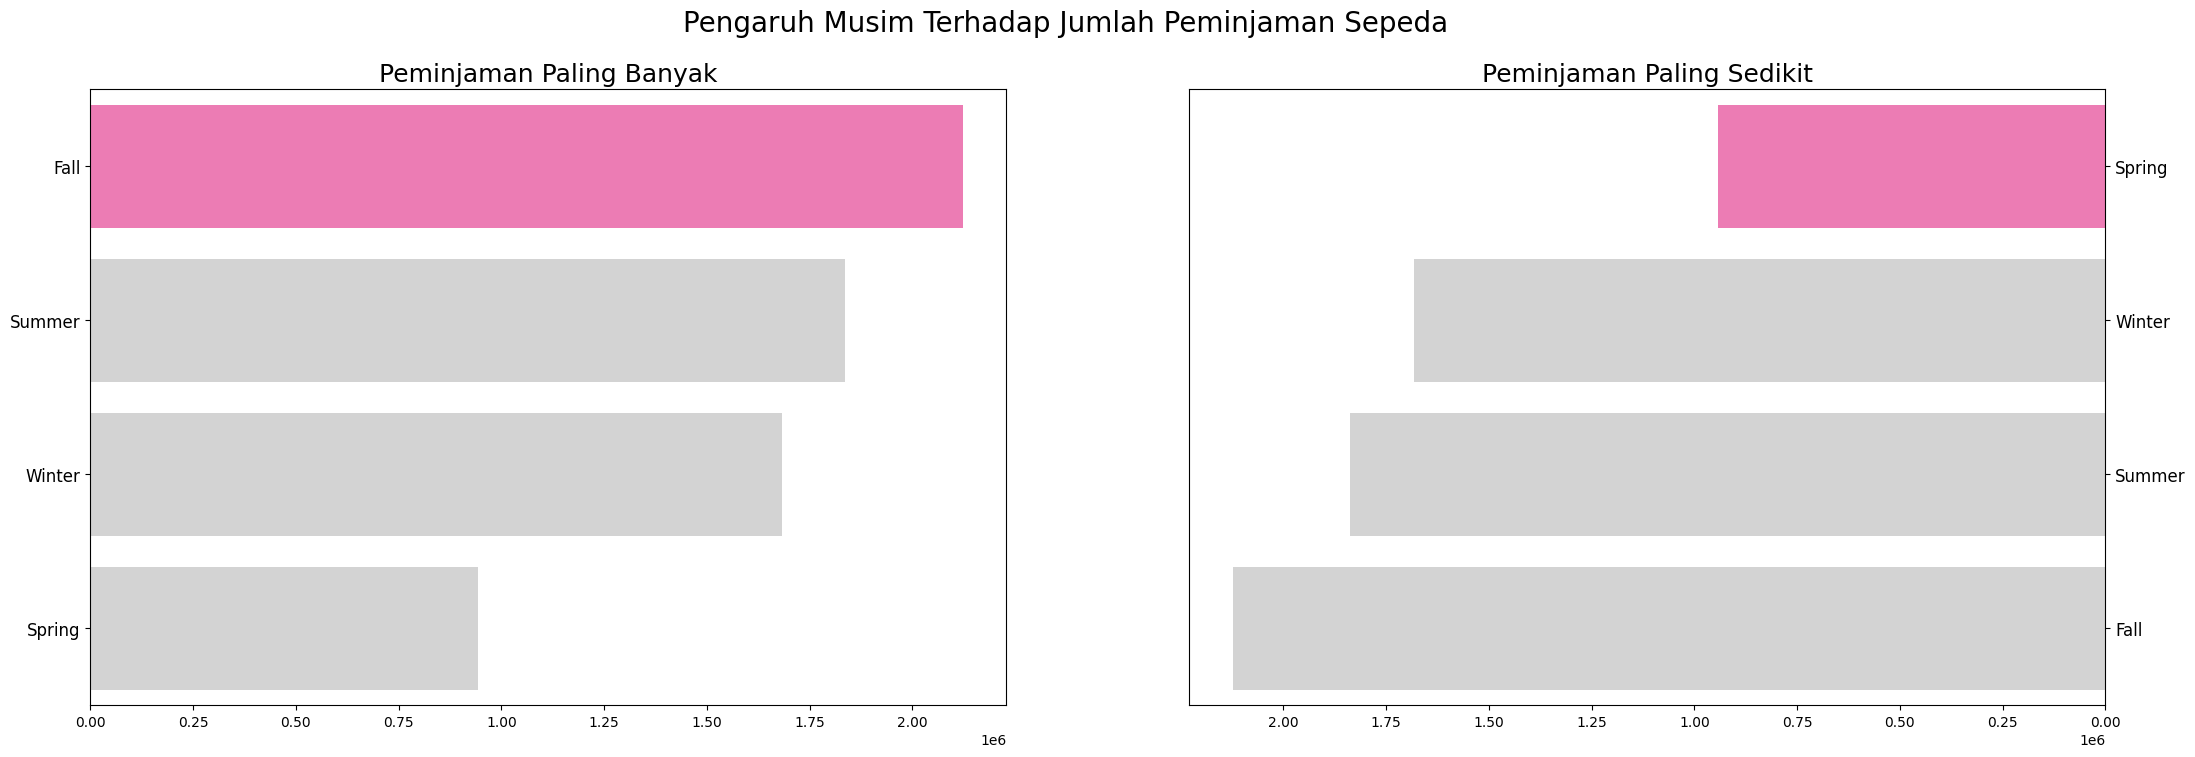

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(26, 8))

colors = ["#FF69B4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="season", data=season_rentals_df.head(4), palette=colors, hue="season", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Peminjaman Paling Banyak", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="cnt", y="season", data=season_rentals_df.sort_values(by="cnt", ascending=True).head(4), palette=colors,hue="season", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Peminjaman Paling Sedikit", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Pengaruh Musim Terhadap Jumlah Peminjaman Sepeda", fontsize=20)
plt.show()

### Pertanyaan 2:

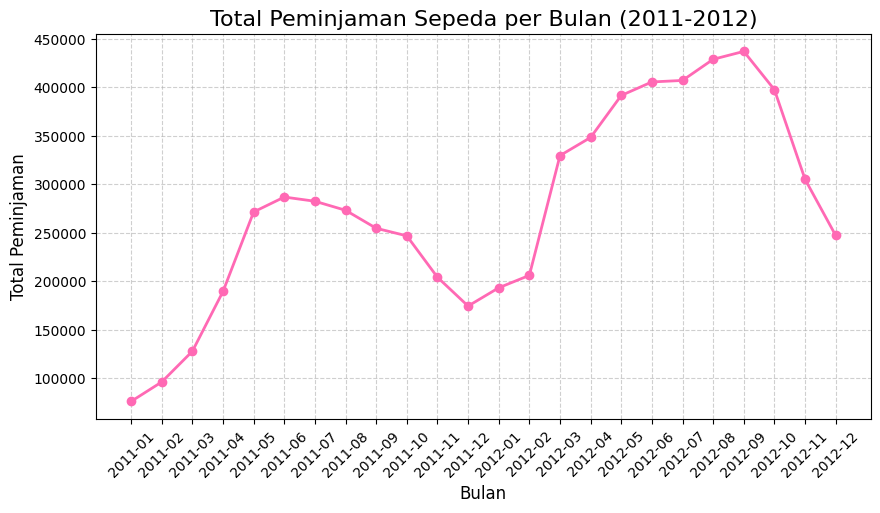

In [45]:

all_df['dteday'] = pd.to_datetime(all_df['dteday'])

monthly_orders_df = all_df.resample(rule='ME', on='dteday').agg({
    "cnt": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "dteday": "Bulan",
    "cnt": "Total Peminjaman"
}, inplace=True)


plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["Bulan"], monthly_orders_df["Total Peminjaman"], marker='o', linewidth=2, color="#FF69B4")

plt.title("Total Peminjaman Sepeda per Bulan (2011-2012)", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Peminjaman", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6) 


plt.show()


**Insight:**
- Untuk mempermudah menganalisa dari dataframe, season_rentals_df, maka dibuat bar chart yang dibuat dari library seaborn . ax[0] merupakan object kiri dan ax[1] merupakan object kanan. Untuk peminjaman yang paling banyak dan paling sedikit ditandai dengan warna pink. 
- Untuk pola tren dalam 2 tahun  terjadi penurunan yang sangat drastis akhir tahun dan penaikan drastis di awal tahun.

## Analisis Lanjutan (Opsional)

In [37]:
min_date = all_df["dteday"].min()
max_date = all_df["dteday"].max()

min_date = min_date.date()
max_date = max_date.date()

with st.sidebar:

    start_date, end_date = st.date_input(
        label ='Rentang Waktu', min_value = min_date, max_value= max_date,
        value = [min_date, max_date]
    )
main_df = all_df [ (all_df["dteday"] >= str(start_date)) &
                    (all_df["dteday"] <= str(end_date) ) ]

2025-03-13 12:41:50.045 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-13 12:41:50.093 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-13 12:41:50.095 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-13 12:41:50.108 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-13 12:41:52.345 
  command:

    streamlit run C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-13 12:41:52.347 Thread 'MainThread': missing ScriptRunContext! This warning can 

## Conclusion

- Berdasarkan bar chart jumlah penyewaan sepeda dari tahun 2011 hingga 2012 yang dikelompokkan berdasarkan musimnya didapatkan penyewaan paling banyak pada saat fall dengan total jumlah total penyewaan sebanyak 2122258 dan penyewaan sepeda paling sedikit pada saat spring dengan jumlah total peminjaman sebanyak 942696. Jumlah penyewaan sepeda per musim dapat dikelompokkan berdasarkan waktu yang ditentukkan menggunakan kalender.
- Berdasarkan grafik , tren peminjaman sepeda dari tahun 2011 hingga 2012 menunjukan pola yang jelas. Peminjaman sepeda meningkat signifikan mulai awal tahun 2011 hingga mencapai puncak pertengahan tahun dan mengalami penurunan pada akhir tahun. Pola yang sama berulang pada tahun 2012. Dapat diketahui nilai tertinggi peminjaman pada bulan September 2012 dan nilai paling rendah pada bulan januari 2011. Grafik tren dapat di tentukan tanggal, bulan, dan tahun menggunakan kalender.